# Problem 2

In [4]:
import imageio
from PIL import Image
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

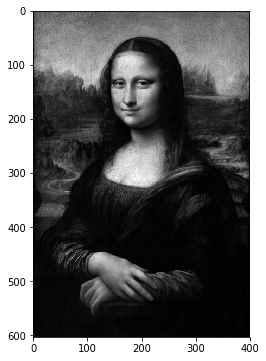

In [81]:
mona_lisa = imageio.imread('mona_lisa.png')
img = Image.open('mona_lisa.png')
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
#plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');
#print(np.count_nonzero(imgmat))
#print(imgmat.nbytes)

In [74]:
U, sigma, V = np.linalg.svd(imgmat)
non_compr_bytes = sum([matrix.nbytes for matrix in [U, sigma, V]])
print("The non-compressed byte storage is: {} bytes".format(non_compr_bytes))

The non-compressed byte storage is: 4192072 bytes


In [87]:
def k_rank(k):
    #reconstimg= np.matrix(U[:,:k]) * np.diag(sigma[:k]) * np.matrix(V[:k,:])
    U_k = np.matrix(U[:,:k])
    Sigma_k = np.diag(sigma[:k])
    V_k = np.matrix(V[:k,:])
    reconst_img= U_k * Sigma_k * V_k
    compr_bytes = sum([matrix.nbytes for matrix in [U_k, Sigma_k, V_k]])
    
    #print("Shape of U for rank {} is: {}".format(k, U_k.shape))
    #print("Shape of Sigma for rank {} is: {}".format(k, Sigma_k.shape))
    #print("Shape of V for rank {} is: {}".format(k, V_k.shape))
    #print("The compressed byte storage for rank {} is: {} bytes".format(k, compr_bytes))
    #print(reconstimg.shape)
    #plt.imshow(reconstimg,cmap='gray')
    
    return reconst_img               

### Rank 2 Approximation

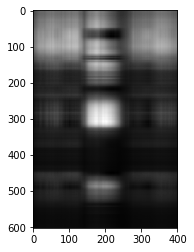

In [88]:
_ = plt.imshow(k_rank(2),cmap='gray')

### Rank 5 Approximation

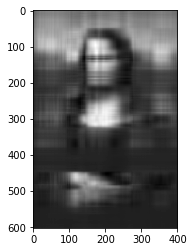

In [89]:
_ = plt.imshow(k_rank(5),cmap='gray')

### Rank 10 Approximation

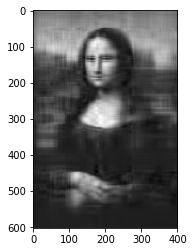

In [90]:
_ = plt.imshow(k_rank(10),cmap='gray')

### Conclusion

<p>
    The total compressed pixels needed are:
    <ul>
        <li>Rank 2: $\quad2,010 \,\, pixels$</li>
        <li>Rank 5: $\quad5,040 \,\, pixels$</li>
        <li>Rank 10: $\,\,\,10,130 \,\, pixels$</li>
    </ul>
</p>
<p>
    Then, the number of bits for each is $(pixels) * (number \, of  \, bytes) * (bits \, per \, byte)$ which is equivalent to $(pixels) * 16$
    <ul>
        <li>Rank 2: $\quad 32,160 \,\, bits$</li>
        <li>Rank 5: $\quad 80,640 \,\, bits$</li>
        <li>Rank 10: $\,\,\, 162,080 \,\, bits$</li>
    </ul>
</p>
        